In [1]:
# !git clone -l -s https://github.com/jonochurch/DAQ-files.git cloned-repo2
# %cd cloned-repo2
!ls

'Current PLotly DAQ analysis.ipynb'		    MathewWoodall-10-02-01.miq
 DH_bike_suspension_calculator.ipynb		    MathewWoodall-10-02-01.zip
'Forbidden Dreadnought MIQ_Leverage Ratio.txt'	    MathewWoodall-10-02-04.zip
'Forbidden Dreadnought MIQ_Shock Compression.txt'   MatsiPhone13-01-28-02.zip
 gps.py						    MatsiPhone13-01-28-03.zip
 iPhone-02-11-03.zip				    MatsiPhone13-01-28-04.zip
 iPhone-02-11-04.zip				    MatsiPhone13-01-28-06.zip
 JarethsS22-01-02-02.zip			    MatsiPhone13-01-28-07.zip
 JarethsS22-12-29-02.zip			    MatsiPhone13-01-28-08.zip
 JarethsS22-12-29-04.zip			    MatsiPhone13-01-28-09.zip
 JarethsS22-12-29-05.zip			    MatsiPhone13-01-28-10.zip
 JessBlewitt-02-20-01.zip			    MatsiPhone13-01-29-01.zip
 MathewWoodall-09-24-01.zip			    MatsiPhone13-01-29-02.zip
 MathewWoodall-09-24-03.csv			    MatsiPhone13-01-29-03.zip
 MathewWoodall-09-24-03-dyno.csv		    MatsiPhone13-11-11-01.zip
 MathewWoodall-09-24-03.zip			    MatsiPhone13-11-11-02.zip
 MathewWoodall-09-24-04.zi

In [4]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy import fft
from scipy.fft import fft, fftfreq
import pandas as pd
import math
from numpy import diff
from scipy import signal
import scipy.stats as stats
import os
import glob
from plotly.subplots import make_subplots
import gpxpy
import gpxpy.gpx
import datetime
from geopy import distance
from math import sqrt, floor
import gps
 
# f= open(".mapbox_token.txt","w+")
# f.write("pk.eyJ1Ijoiam9ub2NodXJjaCIsImEiOiJja3VuZjQzbjEyNTNyMm5vZnF4cWNnbjR5In0.EtsN55_VNAPh07GqeWUgcA")
# f.close()

txtfiles = []
for file in glob.glob("*.zip"):
    txtfiles.append(file)

print(txtfiles)


['MathewWoodall-09-24-01.zip', 'iPhone-02-11-03.zip', 'MathewWoodall-10-01-01.zip', 'MatsiPhone13-01-29-03.zip', 'MatsiPhone13-01-29-01.zip', 'MathewWoodall-10-02-01.zip', 'MatsiPhone13-01-28-06.zip', 'MatsiPhone13-11-12-11.zip', 'MathewWoodall-10-01-03.zip', 'MathewWoodall-10-02-04.zip', 'MatsiPhone13-11-11-01.zip', 'MatsiPhone13-01-28-03.zip', 'MatsiPhone13-01-28-10.zip', 'MathewWoodall-09-24-04.zip', 'iPhone-02-11-04.zip', 'MatsiPhone13-11-11-03.zip', 'MathewWoodall-09-24-03.zip', 'MatsiPhone13-11-12-08.zip', 'MatsiPhone13-11-12-09.zip', 'MatsiPhone13-01-28-09.zip', 'MathewWoodall-10-01-02.zip', 'JarethsS22-12-29-02.zip', 'MatsiPhone13-01-28-07.zip', 'MatsiPhone13-01-28-08.zip', 'JarethsS22-01-02-02.zip', 'MatsiPhone13-01-28-04.zip', 'JarethsS22-12-29-05.zip', 'MatsiPhone13-01-28-02.zip', 'JessBlewitt-02-20-01.zip', 'JarethsS22-12-29-04.zip', 'MatsiPhone13-11-12-10.zip', 'MatsiPhone13-11-11-02.zip', 'MatsiPhone13-01-29-02.zip']


In [4]:
#@title Input { vertical-output: true, display-mode: "both" }
File =  17#@param {type:"integer"}
runindex=File
run = txtfiles[runindex]

print(run)


JessBlewitt-02-20-01.zip


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
# run='/content/drive/MyDrive/Colab Notebooks/DAQ /JarethsS22-01-02-02.zip'

In [5]:
import zipfile
archive = zipfile.ZipFile(f'{run}', 'r')
df=pd.read_csv((archive.open(f'{run[:-4]}.miq')), skiprows=57, skipfooter=26,names=['sample', 'Lat','Lon', 'Alt','Time', 'Speed'])

print(df)

     sample        Lat         Lon          Alt          Time     Speed
0         5 -44.916317  168.738974  1617.864933  1.676848e+09  0.122218
1         6 -44.916313  168.738976  1617.868411  1.676848e+09  0.209794
2         7 -44.916309  168.738977  1617.969429  1.676848e+09  0.099893
3         8 -44.916308  168.738976  1618.043160  1.676848e+09  0.261497
4         9 -44.916308  168.738974  1618.080991  1.676848e+09  0.189837
..      ...        ...         ...          ...           ...       ...
234     239 -44.926714  168.736665  1205.751959  1.676848e+09  0.000000
235     240 -44.926746  168.736617  1205.319680  1.676848e+09  0.000000
236     241 -44.926754  168.736595  1205.149125  1.676848e+09  0.000000
237     242 -44.926761  168.736573  1204.703414  1.676848e+09  0.000000
238     243 -44.926766  168.736562  1204.546599  1.676848e+09  0.000000

[239 rows x 6 columns]


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [6]:
# def plot_route(data):
#   f= open(".mapbox_token.txt","w+")
#   f.write("pk.eyJ1Ijoiam9ub2NodXJjaCIsImEiOiJja3VuZjQzbjEyNTNyMm5vZnF4cWNnbjR5In0.EtsN55_VNAPh07GqeWUgcA")
#   f.close()
#   px.set_mapbox_access_token(open(".mapbox_token.txt").read())

#   fig = px.scatter_mapbox(data, lat="Lat", lon="Lon",     
#                     mapbox_style='satellite', zoom=14, width=700, height=350,
#                     )
#   fig.update_traces(#mode='lines',
#                     marker=dict(
#                         size=5,
#           color=(df['Speed']*3.6), #set color equal to a variable
#           colorscale='Turbo', # one of plotly colorscales
#           showscale=True))
#   fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#   fig.show()
#   fig=px.scatter(data, x=data.index, y='Speed',
#                 width=500, height=150 
#                 )
#   fig.update_traces(mode='lines',
#                     marker=dict(
#                         size=5,))
#   fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

#   return fig.show()

In [7]:
gps.plot_route(df)

In [8]:
startclip=9
endclip=18
file = pd.read_csv(archive.open(f'{run[:-4]}.csv'))

print(file)


                   Time  Front Fork Pos  Rear Axle Pos  Front Accel  \
0                    98            4.61           2.78         0.85   
1                    99            4.61           2.78         0.85   
2                   100            4.69           2.85         0.84   
3                   101            4.61           2.93         0.84   
4                   102            4.54           2.78         0.85   
...                 ...             ...            ...          ...   
48088             48186            6.52           4.90         0.86   
48089             48187            6.52           4.90         0.86   
48090             48188            6.52           4.90         0.86   
48091             48189            6.52           4.83         0.86   
48092  #LineCount=48092             NaN            NaN          NaN   

       Shock Pos  Rear Accel  
0           0.94        0.86  
1           0.94        0.86  
2           0.97        0.85  
3           0.99       

In [9]:

#file=f'https://raw.githubusercontent.com/jonochurch/DAQ-files/main/{run}'
#file = 'https://raw.githubusercontent.com/jonochurch/DAQ-files/main/MathewWoodall-09-24-03.csv'

#file= f'/content/cloned-repo/{run}' 
# linkage = 'https://raw.githubusercontent.com/jonochurch/DAQ-files/main/Forbidden%20Dreadnought%20MIQ_Shock%20Compression.txt'
# leverage = pd.read_csv(f"{linkage}", delim_whitespace=True)

sample_rate = 200 #sets the sample rate data was collected at
Front_Force=np.array(file['Front Accel'])  # pd.read_csv(f"{file}", usecols=['Front Force']))
Rear_Sensor=np.array(file['Shock Pos'])
Front_Axle=np.array(file['Front Fork Pos'])
Rear_Force=np.array(file['Rear Accel'])
Rear_Axle=np.array(file['Rear Axle Pos'])

Front_Force = Front_Force[np.logical_not(np.isnan(Front_Force))]
Rear_Force = Rear_Force[np.logical_not(np.isnan(Rear_Force))]
Rear_Sensor = Rear_Sensor[np.logical_not(np.isnan(Rear_Sensor))]
Front_Axle = Front_Axle[np.logical_not(np.isnan(Front_Axle))] 
Rear_Axle =Rear_Axle[np.logical_not(np.isnan(Rear_Axle))] 
N=len(Front_Axle)
Time=np.arange(0.0, (N/sample_rate), (1/sample_rate))

Rear_Sensor[Rear_Sensor<0] = 0
Front_Axle[Front_Axle<0] = 0
Rear_Axle[Rear_Axle<0] = 0

rms_front = Front_Force**2
rms_front = rms_front.mean()**0.5

print ('Front-', np.round(rms_front),'g /', np.round((rms_front*9.81)),'ms-2')


rms_rear = Rear_Force**2
rms_rear = rms_rear.mean()**0.5

print ('Rear-', np.round(rms_rear, 2), 'g')
print (np.round((rms_rear*9.81), 2), 'ms-2')

Front- 4.0 g / 37.0 ms-2
Rear- 2.58 g
25.3 ms-2


In [10]:
def get_fft(df):
    N=len(df)
    fs = len(df)/(df.index[-1]-df.index[0])
    
    x_plot= fftfreq(N, 1/fs)[:N//2]
    
    df_fft = pd.DataFrame()
    df_phase = pd.DataFrame()
    for name in df.columns:
        yf = fft(df[name].values) 
        
        y_plot= 2.0/N * np.abs(yf[0:N//2])
        
        # phase = np.angle(yf, deg=True)
        # #phase = np.unwrap(2 * np.angle(yf)) / 2 * 180/np.pi
        # df_phase = pd.concat([df_phase,
        #                     pd.DataFrame({'Frequency (Hz)':x_plot[1:],
        #                                   name:phase[1:N//2]}).set_index('Frequency (Hz)')],axis=1)
        
        df_fft = pd.concat([df_fft,
                            pd.DataFrame({'Frequency (Hz)':x_plot[1:],
                                          name:y_plot[1:]}).set_index('Frequency (Hz)')],axis=1)
    
    return df_fft

In [11]:
# pos=[]
# for x in Rear_Sensor:
#   y = np.interp(x, leverage['Shock_Compression'], leverage['Travel'])
#   pos.append(y)

# Rear_Axle = np.array(pos)

In [12]:

def create_force_df (array):
    n=len(array)
    Time=np.arange (0.0, (n/sample_rate), (1/sample_rate))
    data=np.column_stack((Time, array))
    df3=pd.DataFrame(data, columns=['Time', 'Force'])
    df3 = df3.set_index('Time')
    return df3

frontforce= create_force_df(Front_Force)
rearforce=create_force_df(Rear_Force)
forkmv = create_force_df(Front_Axle)
shockmv = create_force_df(Rear_Axle)



In [13]:
ff =get_fft(frontforce)
rf=get_fft(rearforce)
front = get_fft(forkmv)
rear = get_fft(shockmv)



In [14]:


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=front.index[1:], y=front['Force'], name='Front' 
                         ))
fig.add_trace(go.Scatter(x=rear.index[1:], y=rear['Force'], name='Rear' 
             ))
fig.add_trace(go.Scatter(x=ff.index[1:], y=ff['Force'], name='Front Vibration'),
              secondary_y=True)
                         
fig.add_trace(go.Scatter(x=rf.index[1:], y=rf['Force'], name='Rear Vibration'),
            secondary_y=True)
            

fig.update_layout(
    title=f"FFT's {run[:-4]} ",
    xaxis_title="Frequency (Hz)",) 
fig.update_traces(marker_line_width=0.1, opacity=0.7,
                  selector=dict(type='scatter'))                
fig.update_xaxes(type="log")
#fig.update_yaxes(type="log")

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
import scipy.signal as signal

def get_psd(df,bin_width):
    fs = len(df)/(df.index[-1]-df.index[0])    
    f, psd = signal.welch(df.to_numpy(), 
                          fs=fs, 
                          nperseg=fs/bin_width,
                          window='hanning',
                          axis=0
                         )

    df_psd = pd.DataFrame(psd,columns=df.columns)
    df_psd.columns
    df_psd['Frequency (Hz)'] = f
    df_psd = df_psd.set_index('Frequency (Hz)')
    
    return df_psd[1:] #drop the first value because it makes the plots look bad and is effectively 0

In [16]:


fpower=get_psd(frontforce,0.1)
rpower=get_psd(rearforce, 0.1)
forkpsd=get_psd(forkmv, 0.1)
shockpsd=get_psd(shockmv,0.1)

In [17]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
# fig.add_trace(go.Scatter(x=forkpsd.index[1:], y=forkpsd['Force'], name='Front' 
#                          ),secondary_y=True)
# fig.add_trace(go.Scatter(x=shockpsd.index[1:], y=shockpsd['Force'], name='Rear' 
#              ),secondary_y=True)
fig.add_trace(go.Scatter(x=fpower.index[1:], y=fpower['Force'], name='Handlebar Vibration'),
              )
                         
fig.add_trace(go.Scatter(x=rpower.index[1:], y=rpower['Force'], name='Seat Tube Vibration'),
            )
            

fig.update_layout(
    title=f"PSD's {run[:-4]} ",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Acceleration (g^2/Hz)",
    width=1000, height=600) 
fig.update_traces(marker_line_width=0.01, selector=dict(type='scatter'))                
fig.update_xaxes(type="log")

fig.show()

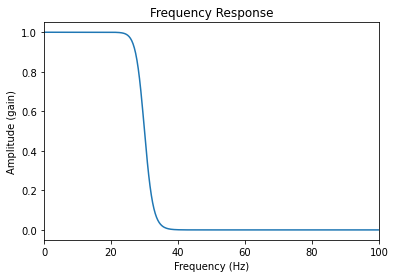

In [18]:
lowcutoff = 30

# # create filter coefficients
b,a = signal.butter(10,lowcutoff/(sample_rate/2),btype='lowpass')

# # evaluate the filter kernel
freq,h = signal.freqz(b,a,fs=sample_rate)
plt.plot(freq,abs(h)**2)
plt.title("Frequency Response")
plt.ylabel("Amplitude (gain)")
plt.xlabel('Frequency (Hz)')
plt.xlim([0,100])
plt.show()

Rear_Velocity = diff(Rear_Axle)/diff(Time)
Fork_Velocity = diff(Front_Axle)/diff(Time) #differentiate fork position to get velocity

Fork_Velocity = signal.filtfilt(b,a,Fork_Velocity)
Rear_Velocity = signal.filtfilt(b,a,Rear_Velocity)

Front_Axle = signal.filtfilt(b,a,Front_Axle)
Rear_Axle = signal.filtfilt(b,a,Rear_Axle)


In [19]:
 #creates time data to plot against samples

Front_Axle = Front_Axle.reshape((-1,)) #transpose the fork data
Rear_Axle = Rear_Axle.reshape((-1))
Fork_Velocity = Fork_Velocity.reshape((-1))
Rear_Velocity = Rear_Velocity.reshape((-1))



In [20]:
Rear_Force = Rear_Force.reshape((-1,))
Front_Force = Front_Force.reshape((-1,))

norm=len(Fork_Velocity)

li = np.column_stack((Time[:norm], Rear_Velocity[:norm], Rear_Force[:norm], Rear_Axle[:norm], Front_Axle[:norm], Fork_Velocity[:norm], Front_Force[:norm])) 

df=pd.DataFrame(li, columns=['Time', 'Rear Velocity', 'Rear Force', 'Rear Axle', 'Front Axle', 'Fork Velocity', 'Front Force'])

print(df)

          Time  Rear Velocity  Rear Force  Rear Axle  Front Axle  \
0        0.000       0.010614        0.86   2.780083    4.609953   
1        0.005       0.683285        0.86   2.818288    4.620011   
2        0.010       0.896195        0.85   2.844593    4.621854   
3        0.015       0.493361        0.85   2.853385    4.613480   
4        0.020      -0.318136        0.86   2.847445    4.600012   
...        ...            ...         ...        ...         ...   
48086  240.430       2.477581        0.91   4.861270    6.505486   
48087  240.435       5.089087        0.91   4.869884    6.502273   
48088  240.440       4.007812        0.90   4.874391    6.502496   
48089  240.445      -2.801060        0.90   4.870043    6.506210   
48090  240.450     -13.918547        0.90   4.854223    6.512433   

       Fork Velocity  Front Force  
0          -0.001201         0.85  
1          -3.646453         0.85  
2          -5.099473         0.84  
3          -3.775770         0.84  
4  

In [21]:

max_compression = np.around(np.nanmax(Fork_Velocity))
print ('Peak Fork Compression Speed = ', max_compression)
max_rebound = np.around(np.nanmin(Fork_Velocity))
print ('Peak Rebound Rebound Speed = ', max_rebound)
max_shock_compression = np.around(np.nanmax(Rear_Velocity))
print ('Peak  Rear Compression Speed = ', max_shock_compression)
max_shock_rebound = np.around(np.nanmin(Rear_Velocity))
print ('Peak Rear Rebound Speed = ', max_shock_rebound)
max_fork = np.nanmax(Front_Axle)
print ('Maximum fork travel used =', np.around(max_fork),'mm')
max_rear = np.nanmax(Rear_Axle)
print ('Maximum rear travel used =', np.around(max_rear),'mm')

Peak Fork Compression Speed =  5553.0
Peak Rebound Rebound Speed =  -2222.0
Peak  Rear Compression Speed =  7233.0
Peak Rear Rebound Speed =  -2398.0
Maximum fork travel used = 166.0 mm
Maximum rear travel used = 199.0 mm


In [22]:

fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Front", "Rear"),
    shared_yaxes=True, horizontal_spacing=0.03)

    
fig.add_trace(go.Histogram2d(x=df['Front Axle'], y=df["Fork Velocity"], 
                               histnorm='percent',
                               colorscale="Turbo", 
                               autobinx=False,
                                xbins=dict(start=0, end=200, size=5),
                                autobiny=False,
                                ybins=dict(start=-2000, end=2000, size=100),
                                 name='Front'                     
                              ),row=1, col=1)
fig.add_trace(go.Histogram2d(x=df['Rear Axle'], y=df["Rear Velocity"], 
                               histnorm='percent',
                               colorscale="Turbo", 
                               autobinx=False,
                                xbins=dict(start=0, end=200, size=5),
                                autobiny=False,
                                ybins=dict(start=-2000, end=2000, size=100),
                                 name='Rear'                     
                              ),row=1, col=2)
                                                                           
#fig.update_traces(zsmooth='best', selector=dict(type='histogram2d'))

fig.update_layout(
    xaxis=dict( ticks='', showgrid=True, zeroline=True  ),
    yaxis=dict( ticks='', showgrid=True, zeroline=True ),
    autosize=False,
    height=550,
    width=1200,
    hovermode='closest')

fig.update_xaxes(tick0=0, dtick=10, row=1, col=1)
fig.update_xaxes(tick0=0, dtick=10, row=1, col=2)
fig.update_yaxes(tick0=-2000, dtick=250)
fig.update_traces(zmin=0, 
    zmax=1, selector=dict(type='histogram2d'))
fig.update_layout(title=f"{run[:-4]}", title_font_size=20)


avgr =np.mean(df['Rear Axle'])
pcr= np.round((avgr/154) * 100, 1)

avgf =np.mean(df['Front Axle'])
pcf= np.round((avgf/170) * 100, 1)

fig.add_vline(x=avgr,
              annotation_text=f"Rear -{pcr}%", line_width=3, line_dash="dash", line_color="green",
              annotation_font_size=12,
              annotation_font_color="green",
              annotation_position='top right')
fig.add_vline(x=avgf,
              annotation_text=f"Front -{pcf}%",  line_width=3, line_dash="dash", line_color="green",
              annotation_font_size=12,
              annotation_font_color="green",
              annotation_position='top left')

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [23]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df["Time"],
    y=df["Fork Velocity"],
    name="Fork Velocity"
))

fig.add_trace(go.Scatter(
    x=df["Time"],
    y=df["Front Axle"],
    name="Front Axle",
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=df["Time"],
    y=df["Front Force"],
    name="Front Force",
    yaxis="y3",
    mode='markers+lines',
    marker=dict(
                size=2,
                
        autocolorscale=False,
        cmid=0,
        color=df["Fork Velocity"], #red = vibration in rebound, blue = compression
        colorscale=[[0, "red"],
        [0.5, "red"],
        [0.5, "blue"],
        [1, "blue"]],
        cauto=True,)
))
fig.add_trace(go.Scatter(
    x=df["Time"],
    y=df["Rear Velocity"],
    name="Rear Velocity"
))

fig.add_trace(go.Scatter(
    x=df["Time"],
    y=df["Rear Axle"],
    name="Rear Axle",
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=df["Time"],
    y=df["Rear Force"],
    name="Rear Force",
    yaxis="y3",
    mode='markers+lines',
    marker=dict(
                size=2,
                
        autocolorscale=False,
        cmid=0,
        color=df["Rear Velocity"], #red = vibration in rebound, blue = compression
        colorscale=[[0, "red"],
        [0.5, "red"],
        [0.5, "blue"],
        [1, "blue"]],
        cauto=True,),           
))

# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.15, 0.85]
    ),
    yaxis=dict(
        title="Velocity",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="Position",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.05
    ),
    yaxis3=dict(
        title="Acceleration",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
    )
# Update layout properties
fig.update_layout(
    title_text="All the squiggles",
    width=1500,
    height=600
)
#fig.update_traces(opacity=0.7, selector=dict(type='scatter'))
fig.update_traces(hoverinfo="all", selector=dict(type='scatter'))


fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
fig=px.scatter(df, x="Front Axle", y="Fork Velocity", color="Front Force",
               #size=1,
               width=600, height=400 
              )
fig.update_traces(mode='markers',
                  marker=dict(
                      size=3,))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.add_vline(x=0,
              line_width=1, 
              line_dash="dash",
              )  
              #line_color="green")
fig.add_hline(y=0,
              line_width=1, 
              line_dash="dash", 
              #line_color="green"
              )
fig.show()

fig=px.scatter(df, x="Rear Axle", y=df["Rear Velocity"], color="Rear Force",
               width=600, height=400 
              )
fig.update_traces(mode='markers',
                  marker=dict(
                      size=3,
                      opacity=0.5))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.add_vline(x=0,
              line_width=1, 
              line_dash="dash",
              )  
              #line_color="green")
fig.add_hline(y=0,
              line_width=1, 
              line_dash="dash", 
              #line_color="green"
              )

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:

fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Front", "Rear"),
    shared_yaxes=True, horizontal_spacing=0.03)

    
fig.add_trace(go.Histogram2d(x=df['Front Force'], y=df["Fork Velocity"], 
                               histnorm='percent',
                               colorscale="Turbo", 
                              #  autobinx=False,
                              #   xbins=dict(start=-16, end=-16, size=1),
                              #   autobiny=False,
                              #   ybins=dict(start=-1500, end=2000, size=100),
                                 name='Front'                     
                              ),row=1, col=1)
fig.add_trace(go.Histogram2d(x=df['Rear Force'], y=df["Rear Velocity"], 
                               histnorm='percent',
                               colorscale="Turbo", 
                              #  autobinx=False,
                              #   xbins=dict(start=-16, end=-16, size=1),
                              #   autobiny=False,
                              #   ybins=dict(start=-1500, end=2000, size=100),
                                 name='Rear'                     
                              ),row=1, col=2)
                                                                           
#fig.update_traces(zsmooth='best', selector=dict(type='histogram2d'))

fig.update_layout(
    xaxis=dict( ticks='', showgrid=True, zeroline=True  ),
    yaxis=dict( ticks='', showgrid=True, zeroline=True ),
    autosize=False,
    height=550,
    width=1200,
    hovermode='closest')

# fig.update_xaxes(tick0=0, dtick=10, row=1, col=1)
# fig.update_xaxes(tick0=0, dtick=10, row=1, col=2)
# fig.update_yaxes(tick0=-1500, dtick=250)
fig.update_traces(zmin=0, 
    zmax=1, selector=dict(type='histogram2d'))
fig.update_layout(title=f"{run[:-4]}", title_font_size=20)



fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:

# fig = make_subplots(
#         rows=1, cols=2,
#         subplot_titles=("Front", "Rear"),
#     shared_yaxes=True, horizontal_spacing=0.03)
fig=go.Figure()

    
fig.add_trace(go.Histogram(x=df["Fork Velocity"], 
                               histnorm='percent',
                           opacity=0.7,
                               #colorscale="Turbo", 
                              #  autobinx=False,
                              #   xbins=dict(start=-16, end=-16, size=1),
                              #   autobiny=False,
                                 xbins=dict(start=-2000, end=2000, size=50),
                                 name='Front' ))                   
 #                             ),row=1, col=1)
fig.add_trace(go.Histogram(x=df["Rear Velocity"], 
                               histnorm='percent',
                           opacity=0.7,
                               #colorscale="Turbo", 
                              #  autobinx=False,
                              #   xbins=dict(start=-16, end=-16, size=1),
                              #   autobiny=False,
                                 xbins=dict(start=-2000, end=2000, size=50),
                                 name='Rear' ))                    
 #                             ),row=1, col=2)
                                                                           
#fig.update_traces(zsmooth='best', selector=dict(type='histogram2d'))

fig.update_layout(
    xaxis=dict( ticks='', showgrid=True, zeroline=True  ),
    yaxis=dict( ticks='', showgrid=True, zeroline=True ),
    autosize=False,
    height=700,
    width=1000,
    hovermode='closest')
#fig.update_layout(barmode='stack')

# fig.update_xaxes(tick0=0, dtick=10, row=1, col=1)
# fig.update_xaxes(tick0=0, dtick=10, row=1, col=2)
# fig.update_yaxes(tick0=-1500, dtick=250)
#fig.update_traces(zmin=0, 
   # zmax=1, selector=dict(type='histogram2d'))
fig.update_layout(title=f"{run[:-4]}", title_font_size=20)
#fig.update_yaxes(type="log")


fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()